In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

api_key = '55fd9f09c162a589ee26dc37ca266b12'
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    #print(city)
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #response = requests.get(query_url + city).json()
    
    # Log the url, record, and set numbers
    #print(response)
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather  = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat      = city_weather['coord']['lat']
        city_lng      = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds   = city_weather['clouds']['all']
        city_wind     = city_weather['wind']['speed']
        city_country  = city_weather['sys']['country']
        city_date     = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        #print(city_data)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | iskateley
Processing Record 3 of Set 1 | chui
Processing Record 4 of Set 1 | altai
Processing Record 5 of Set 1 | sechura
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | hasaki
Processing Record 8 of Set 1 | olonkinbyen
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | constantia
Processing Record 13 of Set 1 | santiago de cao
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | road town
Processing Record 16 of Set 1 | meadow lake
Processing Record 17 of Set 1 | bubaque
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | loa janan
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | ribeira grande
Processing Record 23

Processing Record 39 of Set 4 | mercedes
Processing Record 40 of Set 4 | linxia chengguanzhen
Processing Record 41 of Set 4 | vernon
Processing Record 42 of Set 4 | brevard
Processing Record 43 of Set 4 | california
Processing Record 44 of Set 4 | acarau
Processing Record 45 of Set 4 | talara
Processing Record 46 of Set 4 | mpulungu
Processing Record 47 of Set 4 | ryotsu-minato
Processing Record 48 of Set 4 | vila do maio
Processing Record 49 of Set 4 | smithers
Processing Record 0 of Set 5 | enoch
Processing Record 1 of Set 5 | kulia village
City not found. Skipping...
Processing Record 2 of Set 5 | kaesong
Processing Record 3 of Set 5 | i-n-salah
Processing Record 4 of Set 5 | chawang
Processing Record 5 of Set 5 | fale old settlement
Processing Record 6 of Set 5 | zaraza
Processing Record 7 of Set 5 | pantai cenang
City not found. Skipping...
Processing Record 8 of Set 5 | tallahassee
Processing Record 9 of Set 5 | lyantor
Processing Record 10 of Set 5 | alofi
Processing Record 11 o

Processing Record 28 of Set 8 | rafsanjan
Processing Record 29 of Set 8 | mount gambier
Processing Record 30 of Set 8 | south hedland
Processing Record 31 of Set 8 | caxito
Processing Record 32 of Set 8 | gizo
Processing Record 33 of Set 8 | ashland
Processing Record 34 of Set 8 | arraias
Processing Record 35 of Set 8 | homer
Processing Record 36 of Set 8 | dubbo
Processing Record 37 of Set 8 | touros
Processing Record 38 of Set 8 | mae ramat
Processing Record 39 of Set 8 | forster
Processing Record 40 of Set 8 | nicoya
Processing Record 41 of Set 8 | turan
Processing Record 42 of Set 8 | laikit, laikit ii (dimembe)
Processing Record 43 of Set 8 | kataragama
City not found. Skipping...
Processing Record 44 of Set 8 | new norfolk
Processing Record 45 of Set 8 | banda aceh
Processing Record 46 of Set 8 | montevallo
Processing Record 47 of Set 8 | choibalsan
Processing Record 48 of Set 8 | inhambane
Processing Record 49 of Set 8 | letlhakane
Processing Record 0 of Set 9 | aromashevo
Proce

Processing Record 17 of Set 12 | dosso
Processing Record 18 of Set 12 | ghadamis
Processing Record 19 of Set 12 | kolonia
Processing Record 20 of Set 12 | colares
Processing Record 21 of Set 12 | lukolela
Processing Record 22 of Set 12 | richards bay
Processing Record 23 of Set 12 | tchollire
Processing Record 24 of Set 12 | patia
Processing Record 25 of Set 12 | mabaruma
Processing Record 26 of Set 12 | santa ana de yacuma
Processing Record 27 of Set 12 | kalemie
Processing Record 28 of Set 12 | nueva loja
Processing Record 29 of Set 12 | limon
Processing Record 30 of Set 12 | kosan
Processing Record 31 of Set 12 | miri
Processing Record 32 of Set 12 | yamada
Processing Record 33 of Set 12 | bereznik
Processing Record 34 of Set 12 | chipinge
Processing Record 35 of Set 12 | murzuq
Processing Record 36 of Set 12 | toccoa
Processing Record 37 of Set 12 | isangel
Processing Record 38 of Set 12 | bazarak
Processing Record 39 of Set 12 | chifeng
Processing Record 40 of Set 12 | luoyang
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isafjordur,66.0755,-23.1240,4.48,87,100,2.19,IS,1697940870
1,iskateley,67.6803,53.1512,-0.27,85,99,10.19,RU,1697940871
2,chui,-33.6971,-53.4616,16.35,89,13,5.18,UY,1697940871
3,altai,46.3722,96.2583,4.07,30,4,2.07,MN,1697940872
4,sechura,-5.5569,-80.8222,21.78,77,18,5.83,PE,1697940750


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


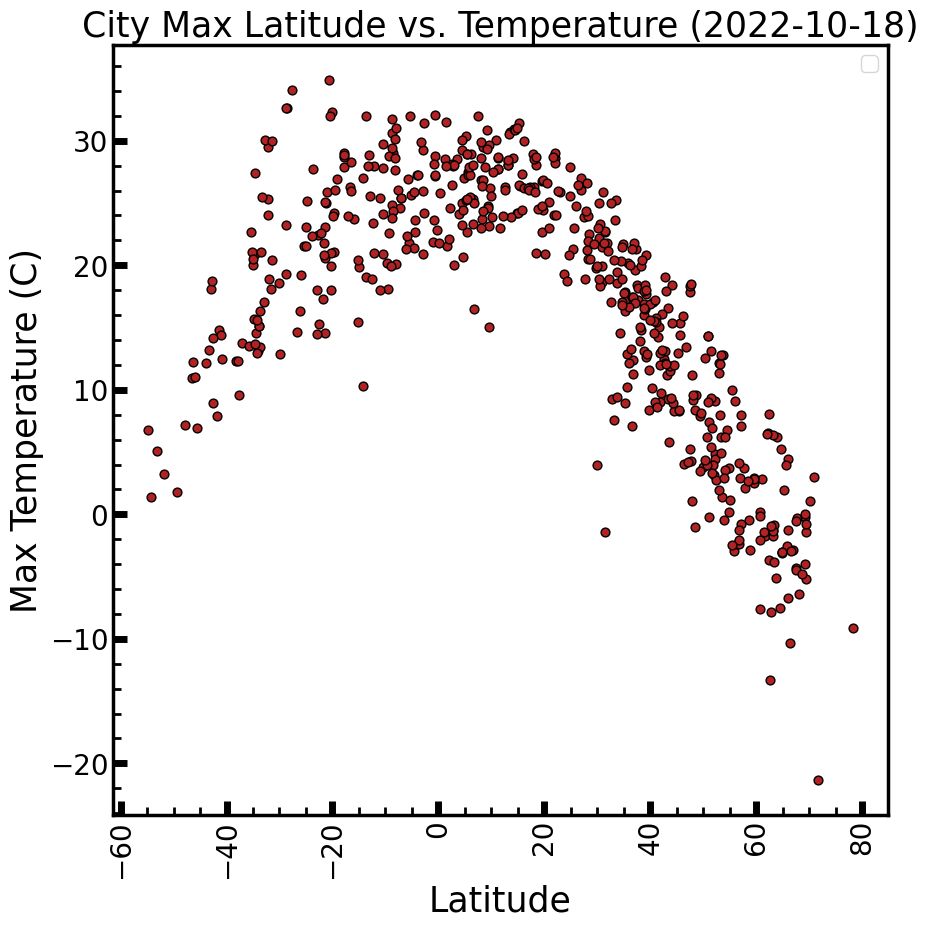

In [6]:
# Create a figure object
fig = plt.figure(figsize=(10,10))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Create the plot
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', s=40, color='firebrick', edgecolor='k')
#plt.plot(city_data_df["Lat"], city_data_df["Max Temp"], marker='.', markersize=16, color='firebrick', linestyle="none")
plt.title('City Max Latitude vs. Temperature (2022-10-18)',fontsize=25)
plt.xlabel('Latitude', fontsize=25)
plt.ylabel('Max Temperature (C)', fontsize=25)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=5.0, direction='in', labelsize=20, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xticks(rotation=90)

# Show the plot
plt.legend(loc="upper right", fontsize=15)
#plt.tight_layout()
plt.savefig("output/Fig1.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


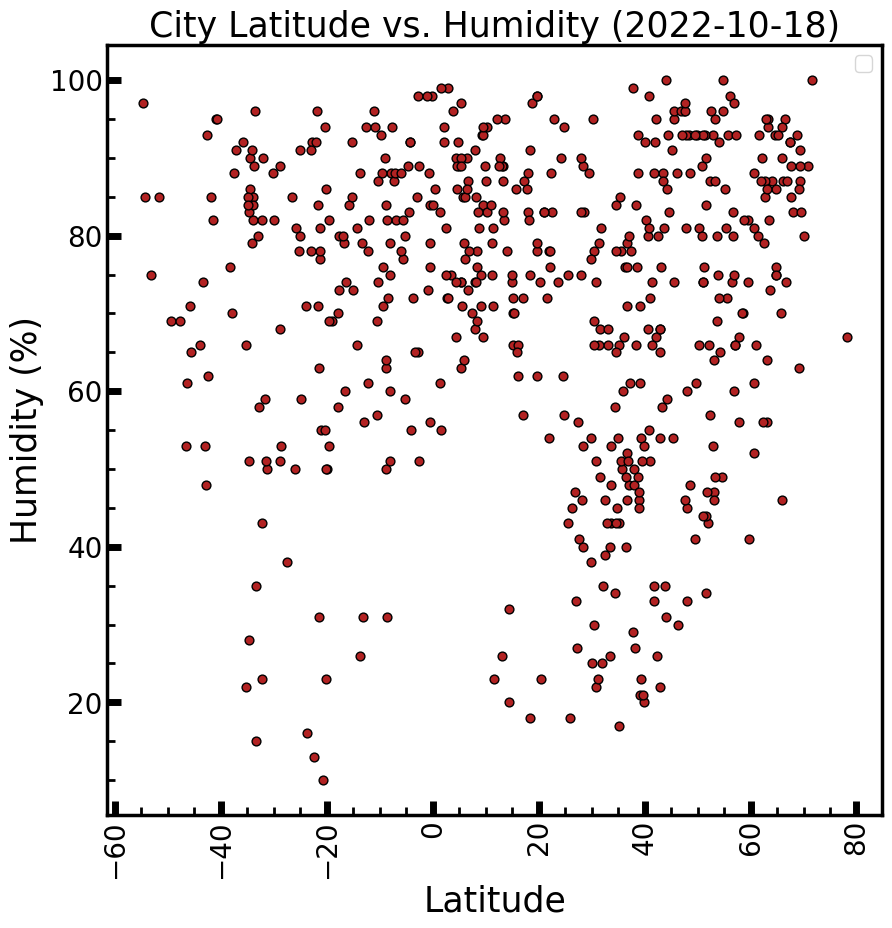

In [7]:
# Create a figure object
fig = plt.figure(figsize=(10,10))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Create the plot
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', s=40, color='firebrick', edgecolor='k')
#plt.plot(city_data_df["Lat"], city_data_df["Max Temp"], marker='.', markersize=16, color='firebrick', linestyle="none")
plt.title('City Latitude vs. Humidity (2022-10-18)',fontsize=25)
plt.xlabel('Latitude', fontsize=25)
plt.ylabel('Humidity (%)', fontsize=25)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=5.0, direction='in', labelsize=20, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xticks(rotation=90)

# Show the plot
plt.legend(loc="upper right", fontsize=15)
#plt.tight_layout()
plt.savefig("output/Fig2.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


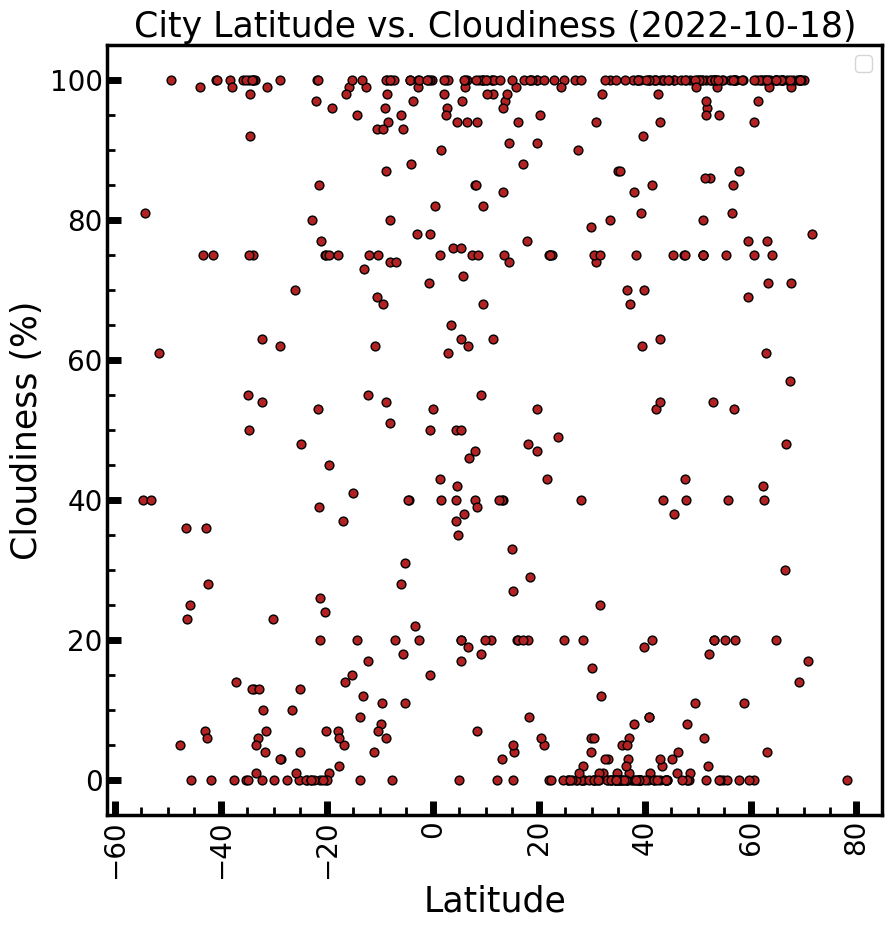

In [8]:
# Create a figure object
fig = plt.figure(figsize=(10,10))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Create the plot
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', s=40, color='firebrick', edgecolor='k')
#plt.plot(city_data_df["Lat"], city_data_df["Max Temp"], marker='.', markersize=16, color='firebrick', linestyle="none")
plt.title('City Latitude vs. Cloudiness (2022-10-18)',fontsize=25)
plt.xlabel('Latitude', fontsize=25)
plt.ylabel('Cloudiness (%)', fontsize=25)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=5.0, direction='in', labelsize=20, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xticks(rotation=90)

# Show the plot
plt.legend(loc="upper right", fontsize=15)
#plt.tight_layout()
plt.savefig("output/Fig3.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


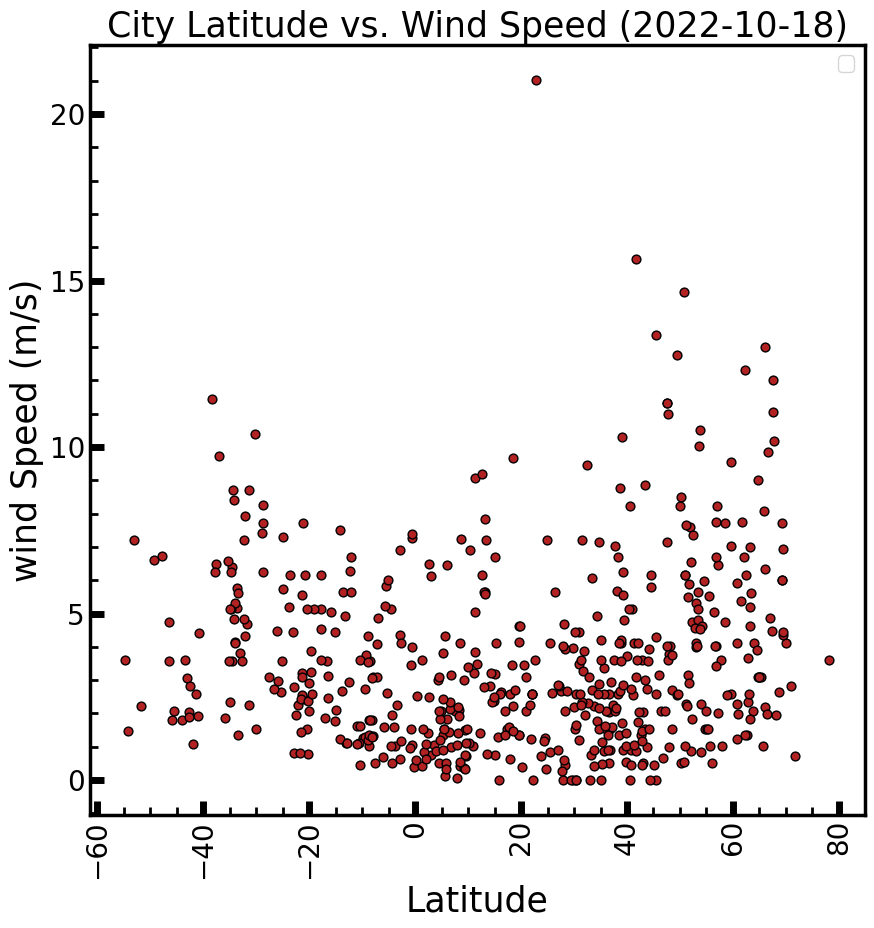

In [9]:
# Create a figure object
fig = plt.figure(figsize=(10,10))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Create the plot
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', s=40, color='firebrick', edgecolor='k')
#plt.plot(city_data_df["Lat"], city_data_df["Max Temp"], marker='.', markersize=16, color='firebrick', linestyle="none")
plt.title('City Latitude vs. Wind Speed (2022-10-18)',fontsize=25)
plt.xlabel('Latitude', fontsize=25)
plt.ylabel('wind Speed (m/s)', fontsize=25)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=5.0, direction='in', labelsize=20, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xticks(rotation=90)

# Show the plot
plt.legend(loc="upper right", fontsize=15)
#plt.tight_layout()
plt.savefig("output/Fig4.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [28]:
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def reg(dataframe, x, y):
    
    # Add the linear regression equation and line to plot
    x_values = dataframe[x]
    y_values = dataframe[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values                             = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    fig = plt.figure(figsize=(10,10))
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 2.50
    plt.scatter(x_values,y_values, marker='o', s=40, color='firebrick', edgecolor='k')
    plt.plot(x_values,regress_values,"k-")
    #plt.annotate(line_eq, fontsize=20,color="g")
    plt.xlabel(x, fontsize=25)
    plt.ylabel(y, fontsize=25)
    plt.minorticks_on() 
    plt.tick_params(which='major', length=10, width=5.0, direction='in', labelsize=20, labelcolor='k')
    plt.tick_params(which='minor', length=6, width=2.0, direction='in')
    print(f"The r-value is: {rvalue}")
    plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat'] > 0)]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isafjordur,66.0755,-23.1240,4.48,87,100,2.19,IS,1697940870
1,iskateley,67.6803,53.1512,-0.27,85,99,10.19,RU,1697940871
3,altai,46.3722,96.2583,4.07,30,4,2.07,MN,1697940872
6,hasaki,35.7333,140.8333,20.16,50,5,3.38,JP,1697940783
7,olonkinbyen,70.9221,-8.7187,3.02,89,17,2.82,SJ,1697940873


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,chui,-33.6971,-53.4616,16.35,89,13,5.18,UY,1697940871
4,sechura,-5.5569,-80.8222,21.78,77,18,5.83,PE,1697940750
5,waitangi,-43.9535,-176.5597,12.12,66,99,1.79,NZ,1697940872
9,adamstown,-25.0660,-130.1015,23.04,80,13,3.58,PN,1697940605
10,saint-philippe,-21.3585,55.7679,20.62,81,26,3.23,RE,1697940874


###  Temperature vs. Latitude Linear Regression Plot


The r-value is: -0.900040401009153


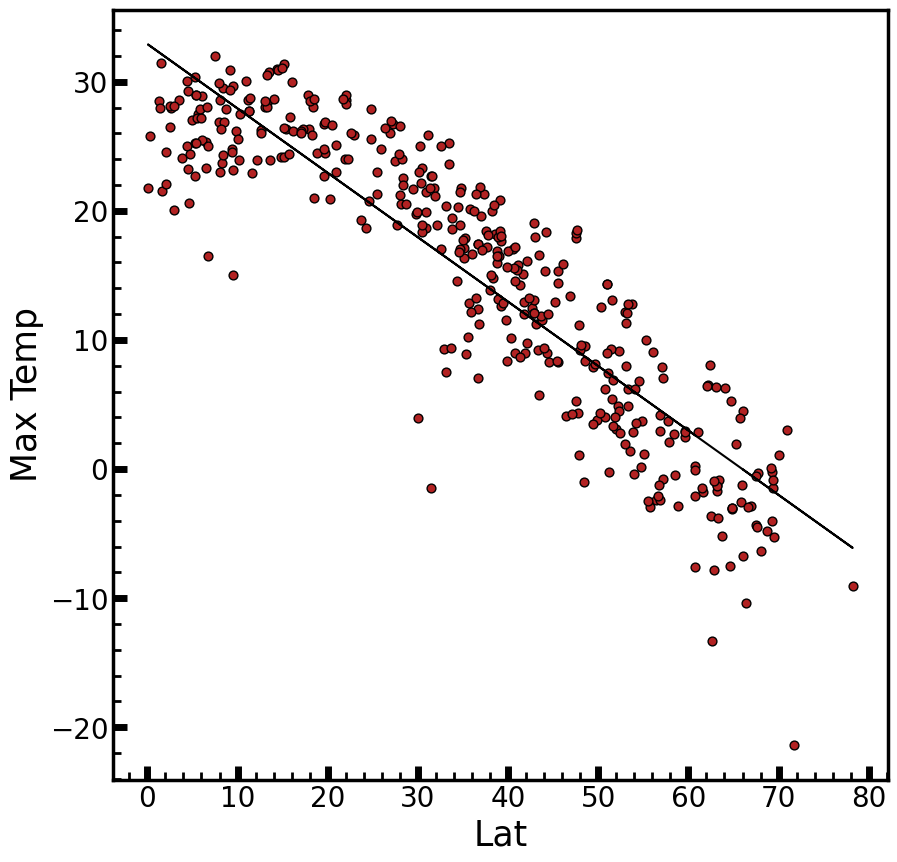

In [31]:
# Linear regression on Northern Hemisphere

reg(northern_hemi_df, "Lat", "Max Temp")

The r-value is: 0.6838151098598251


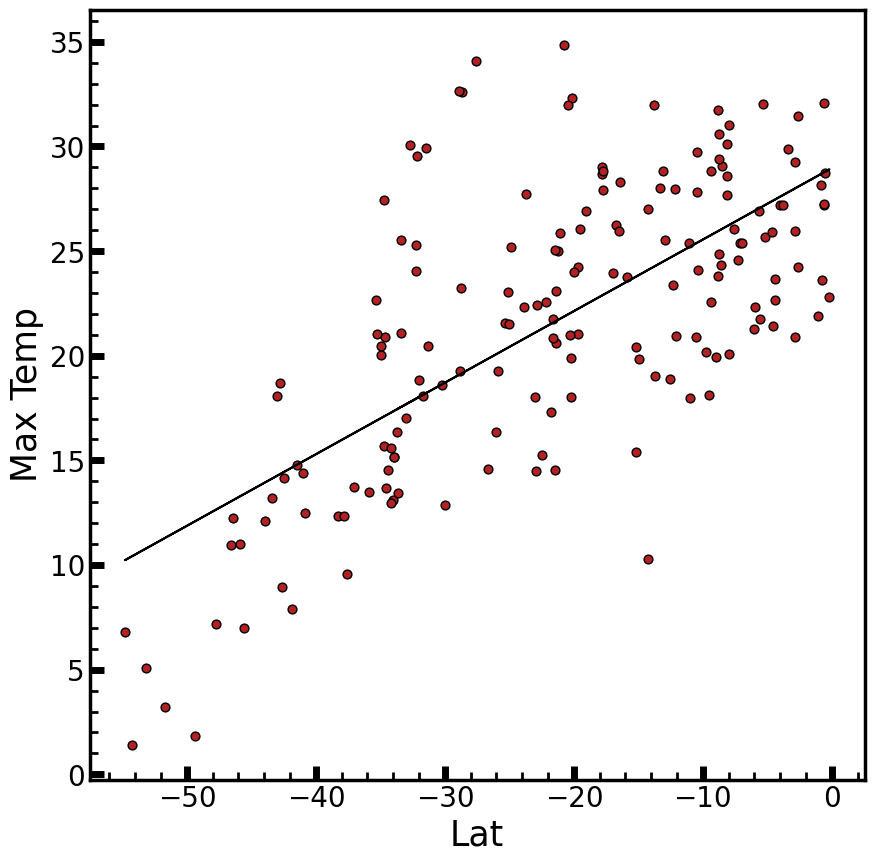

In [32]:
# Linear regression on Northern Hemisphere

reg(southern_hemi_df, "Lat", "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.009257560193587831


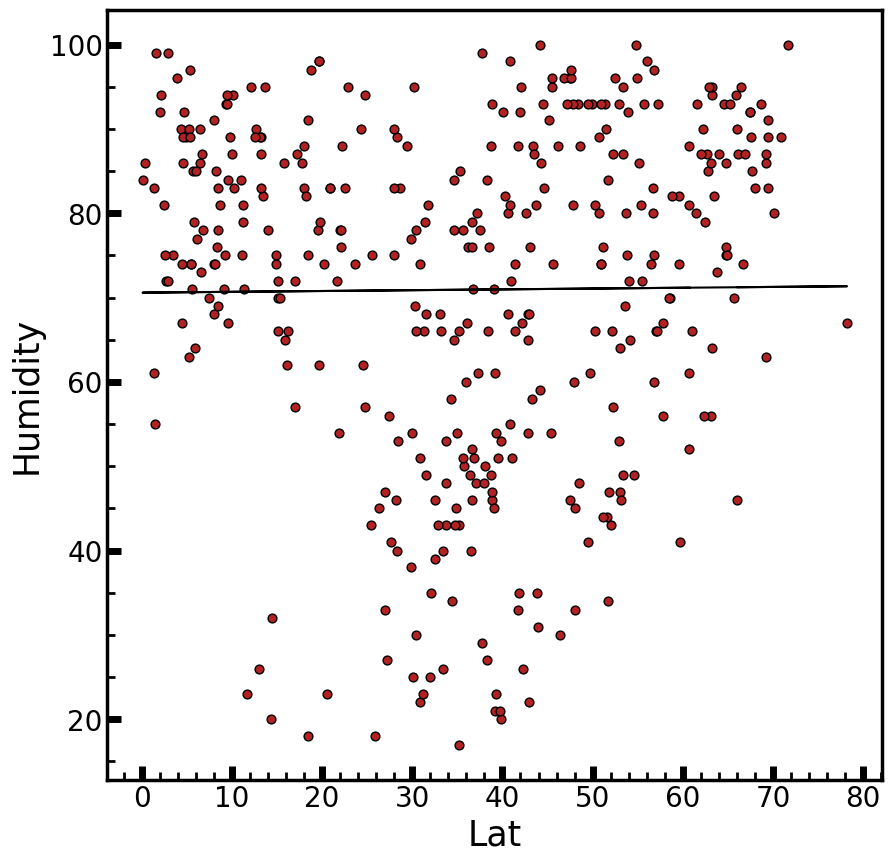

The r-value is: 0.08967349347478007


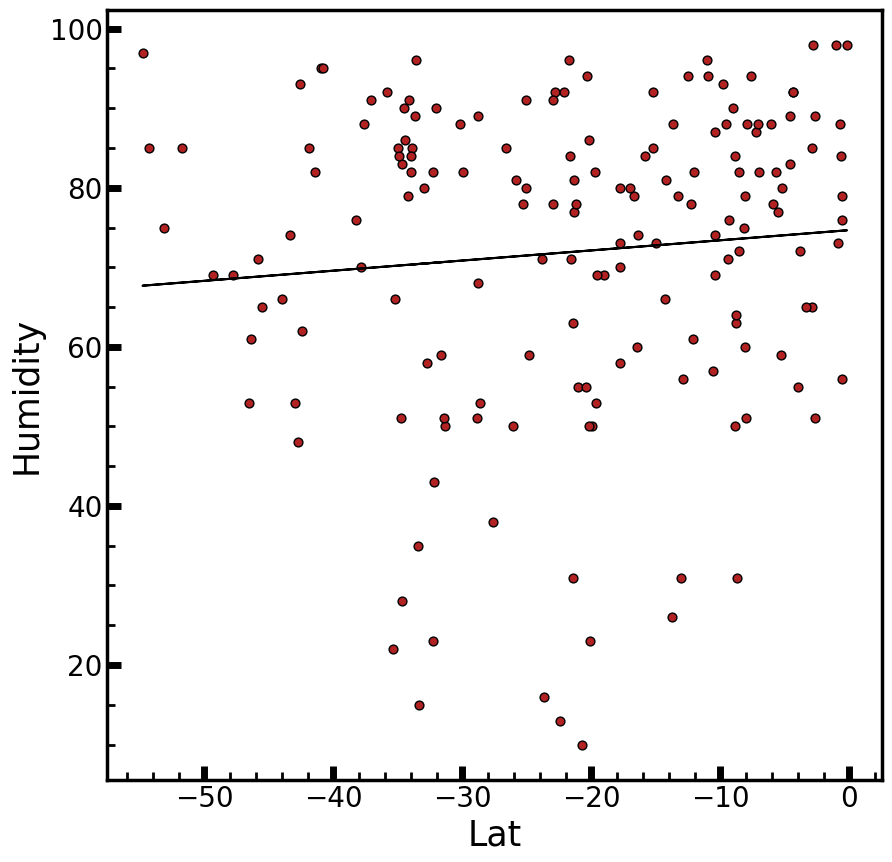

In [36]:
# Northern Hemisphere
reg(northern_hemi_df, "Lat", "Humidity")
reg(southern_hemi_df, "Lat", "Humidity")

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08751969643751836


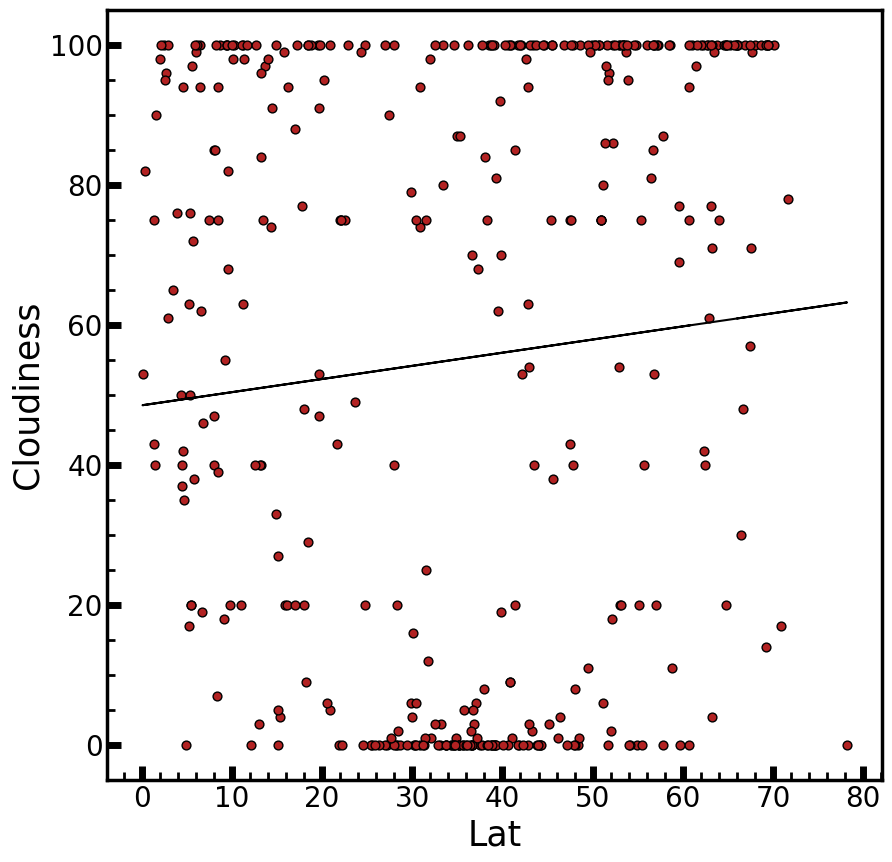

The r-value is: 0.17748514304804439


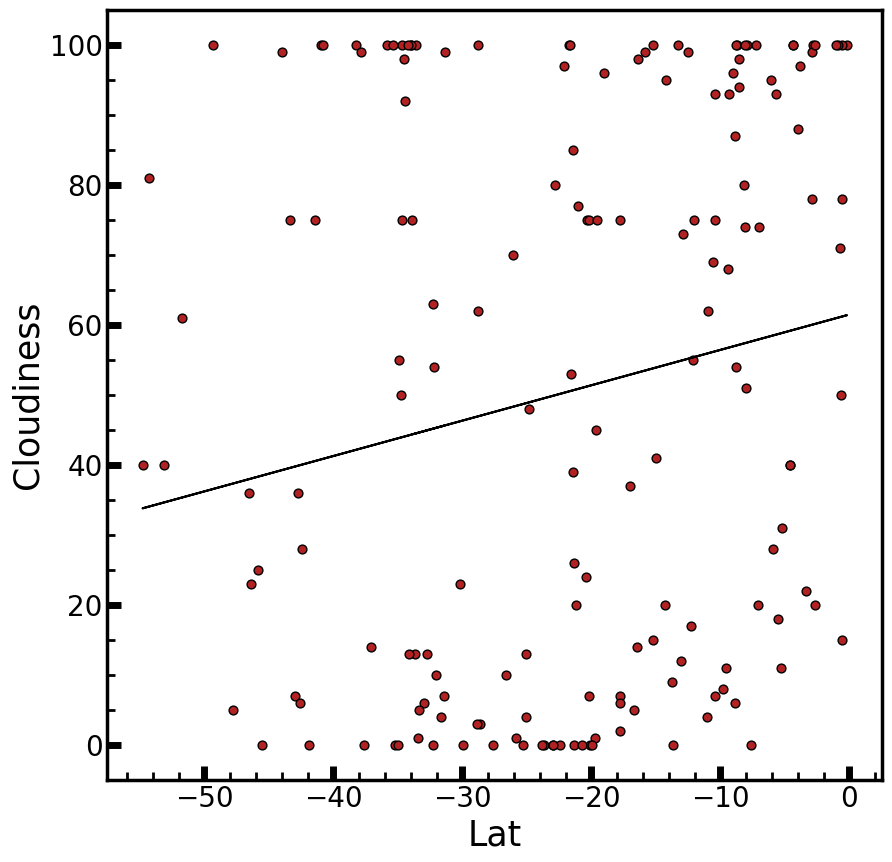

In [37]:
# Northern Hemisphere
reg(northern_hemi_df, "Lat", "Cloudiness")
reg(southern_hemi_df, "Lat", "Cloudiness")

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.29812943343468945


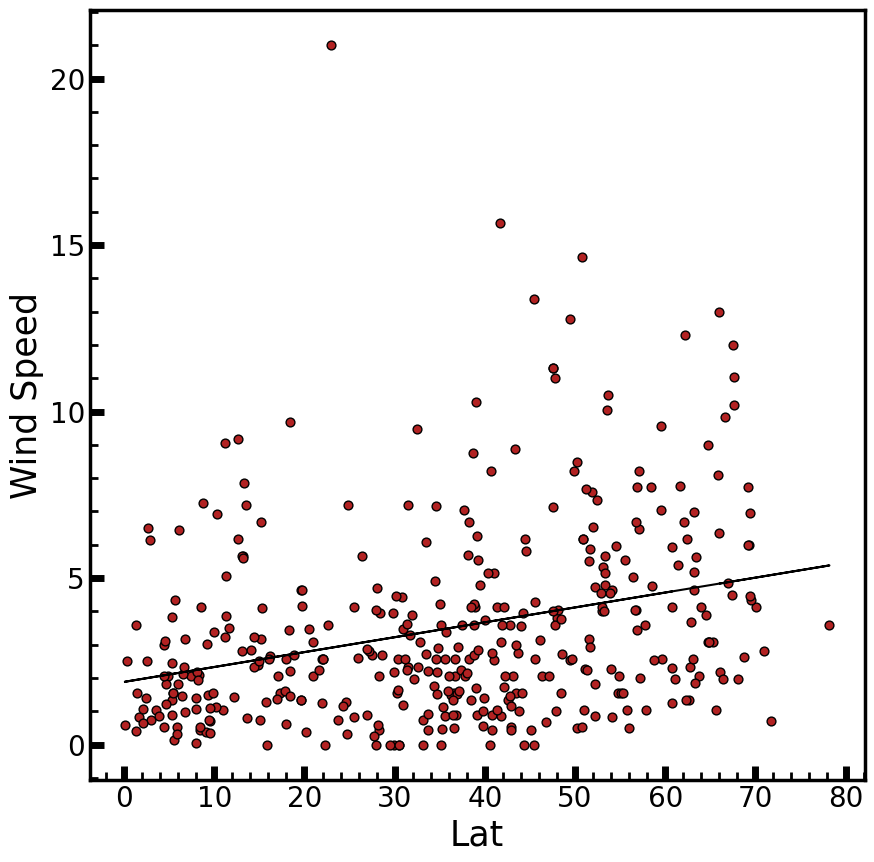

The r-value is: -0.28548745765097333


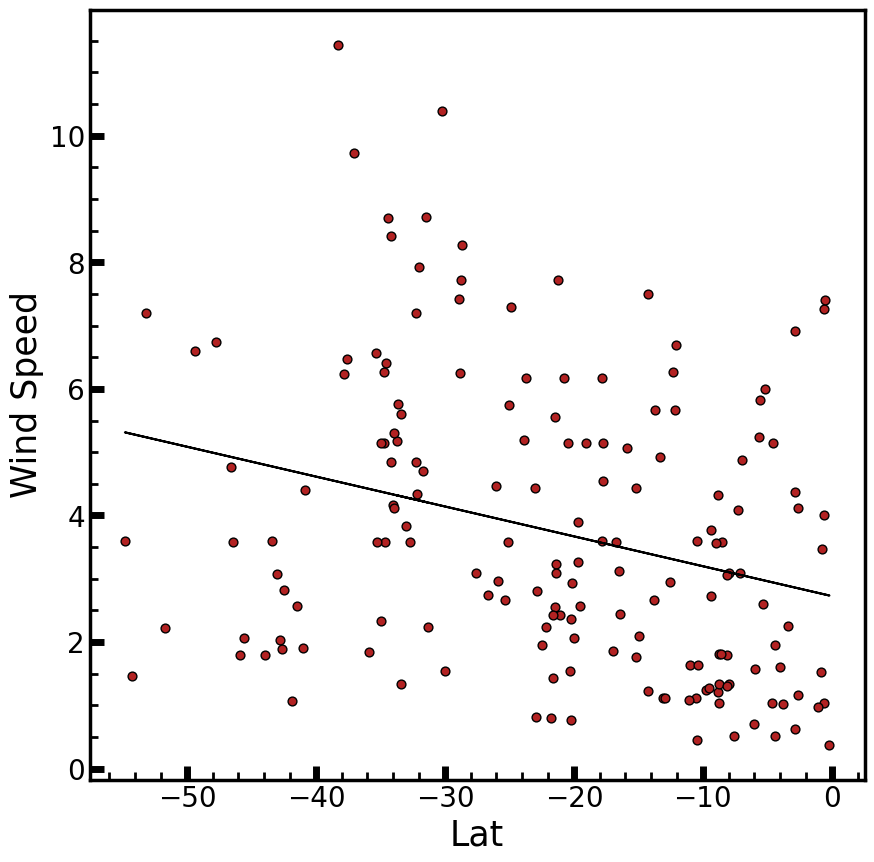

In [38]:
# Northern Hemisphere
reg(northern_hemi_df, "Lat", "Wind Speed")
reg(southern_hemi_df, "Lat", "Wind Speed")